**Automatic Scene Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> **Imports**



In [ ]:
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout  
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.metrics import categorical_crossentropy
  from tensorflow.keras.preprocessing.image import  ImageDataGenerator
  from sklearn.metrics import confusion_matrix
  import itertools
  import os
  import cv2
  import shutil
  import random
  import glob
  import matplotlib.pyplot as plt
  import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline


>**Data Preparation**

>>**Videos --> Frames**

In [ ]:
def VideoToFrames(Video):
    cam = cv2.VideoCapture(Video)
    # try:
    #     if not os.path.exists(destination):
    #         os.makedirs(destination)
    # except OSError:
    #     print('Error: Creating directory of data')
    currentframe = 0

    while True:
        ret, frame = cam.read()
        if ret:
            name = Video + '_' + str(currentframe) + '.jpg'
            print('Creating...' + name)
            cv2.imwrite(name, frame)
            currentframe += 1
        else:
            break
    cam.release()
    cv2.destroyAllWindows()

In [ ]:
for filename in os.listdir('/content/drive/MyDrive/Train_V/Violent'):
     videoPath = '/content/drive/MyDrive/Train_V/Violent/'+ filename
     VideoToFrames(videoPath)
for filename in os.listdir('/content/drive/MyDrive/Train_V/Non-Violent'):
       videoPath =  '/content/drive/MyDrive/Train_V/Non-Violent/' + filename
       VideoToFrames(videoPath)

for filename in os.listdir('/content/drive/MyDrive/Valid_V/Violent'):
     videoPath = '/content/drive/MyDrive/Valid_V/Violent' + filename
     VideoToFrames(videoPath)
for filename in os.listdir('/content/drive/MyDrive/Valid_V/Non-Violent'):
     videoPath = '/content/drive/MyDrive/Valid_V/Non-Violent/' + filename
     VideoToFrames(videoPath)

for filename in os.listdir('/content/drive/MyDrive/Test_V/Violent'):
     videoPath = '/content/drive/MyDrive/Test_V/Violent/' + filename
     VideoToFrames(videoPath)
for filename in os.listdir('/content/drive/MyDrive/Test_V/Non-Violent'):
      videoPath = '/content/drive/MyDrive/Test_V/Non-Violent/' + filename
      VideoToFrames(videoPath)

Streaming output truncated to the last 5000 lines.
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_277.jpg
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_278.jpg
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_279.jpg
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_280.jpg
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_281.jpg
Creating.../content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Car

>>**Moving Frames To Processing Locations**

In [ ]:
for filename in os.listdir('/content/drive/MyDrive/Train_V/Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Train_V/Violent/' + filename 
        destination = '/content/drive/MyDrive/Train/Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue
for filename in os.listdir('/content/drive/MyDrive/Train_V/Non-Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Train_V/Non-Violent/' + filename 
        destination = '/content/drive/MyDrive/Train/Non-Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue


for filename in os.listdir('/content/drive/MyDrive/Valid_V/Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Valid_V/Violent/'+ filename 
        destination = '/content/drive/MyDrive/Valid/Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue
for filename in os.listdir('/content/drive/MyDrive/Valid_V/Non-Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Valid_V/Non-Violent/' + filename 
        destination = '/content/drive/MyDrive/Valid/Non-Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue


for filename in os.listdir('/content/drive/MyDrive/Test_V/Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Test_V/Violent/' + filename 
        destination = '/content/drive/MyDrive/Test/Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue
for filename in os.listdir('/content/drive/MyDrive/Test_V/Non-Violent'):
    if filename.endswith(".jpg"):
        source = '/content/drive/MyDrive/Test_V/Non-Violent/' + filename 
        destination = '/content/drive/MyDrive/Test/Non-Violent'
        shutil.move(source, destination)
        print('moved' + source + 'to' + destination)
        continue
    else:
        continue

Streaming output truncated to the last 5000 lines.
moved/content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_277.jpgto/content/drive/MyDrive/Test/Violent
moved/content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_278.jpgto/content/drive/MyDrive/Test/Violent
moved/content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_279.jpgto/content/drive/MyDrive/Test/Violent
moved/content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9zg.avi_280.jpgto/content/drive/MyDrive/Test/Violent
moved/content/drive/MyDrive/Test_V/Violent/Violent_Crowd_football_violence__Football_Hooligans_Carlisle_v_Preston_1993__prestonparasoccer__JfLHSqKm9z




>> **Adjusting Size, Format And Defining Classes**

In [ ]:
train_path = '/content/drive/MyDrive/Train'
valid_path = '/content/drive/MyDrive/Valid'
test_path = '/content/drive/MyDrive/Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224, 224), classes=['Non-Violent', 'Violent'], batch_size=30)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['Non-Violent', 'Violent'], batch_size=20)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224, 224), classes=['Non-Violent', 'Violent'], batch_size=16, shuffle=False)

Found 56160 images belonging to 2 classes.
Found 6680 images belonging to 2 classes.
Found 9232 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 56160
assert valid_batches.n == 6680
assert test_batches.n == 9232
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

>>**Plotting The First Training Batch**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

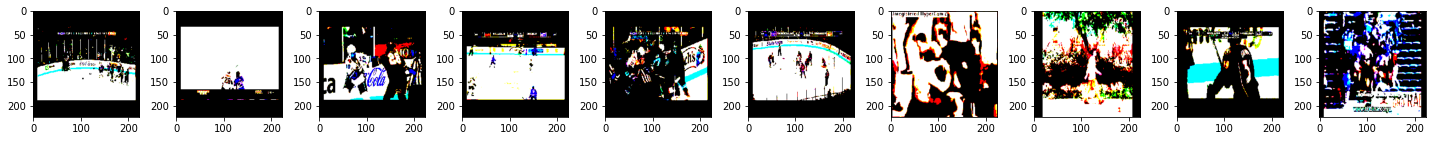

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
imgs, labels = next(train_batches)
def plotImages (images_arr):
  fig, axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("on")
  plt.tight_layout()
  plt.show()

plotImages(imgs)
print(labels)

*italicized text*>**Model Architecture And Training**

>>**Model Architecture**


In [ ]:
model = Sequential ([Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
                     Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=10, kernel_size=(1,1), activation='relu', padding='same'),
                     BatchNormalization(),
                     MaxPool2D(pool_size=(2,2),strides=2),
                     Dropout(0.1),

                     Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
                     Conv2D(filters=12, kernel_size=(1,1), activation='relu', padding='same'),
                     BatchNormalization(),
                     MaxPool2D(pool_size=(2, 2), strides=2),
                     Dropout(0.1),


                     Conv2D(filters=128, kernel_size=(7,7), activation='relu', padding='same'),
                     Conv2D(filters=14, kernel_size=(1, 1), activation='relu', padding='same'),
                     BatchNormalization(),
                     MaxPool2D(pool_size=(2, 2), strides=2),
                     Dropout(0.1),

                     Flatten(),
                     Dense(units=2, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 10)      170       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 10)      40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 10)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      8


>>**Training Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2,steps_per_epoch= 1872, validation_steps=334)
model.save('/content/drive/MyDrive/Project/Model2.h5')

Epoch 1/20
1872/1872 - 13110s - loss: 0.1364 - accuracy: 0.9460 - val_loss: 0.2688 - val_accuracy: 0.9361
Epoch 2/20
1872/1872 - 254s - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.6698 - val_accuracy: 0.8868
Epoch 3/20
1872/1872 - 251s - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.6476 - val_accuracy: 0.8898
Epoch 4/20
1872/1872 - 251s - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.4784 - val_accuracy: 0.9296
Epoch 5/20
1872/1872 - 251s - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.5947 - val_accuracy: 0.9217
Epoch 6/20
1872/1872 - 250s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.4290 - val_accuracy: 0.9377
Epoch 7/20
1872/1872 - 250s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5049 - val_accuracy: 0.9302
Epoch 8/20
1872/1872 - 250s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.4897 - val_accuracy: 0.9337
Epoch 9/20
1872/1872 - 250s - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.4693 - val_accuracy: 0.9389
Epoch 10/20
1872/1872 - 251s - loss: 0.0029 - accuracy: 0.9991

In [ ]:
# !mkdir -p saved_model2
#  model.save('/content/drive/MyDrive/Project') 


>**Testing Model**

>> **Plotting First Test Batch**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

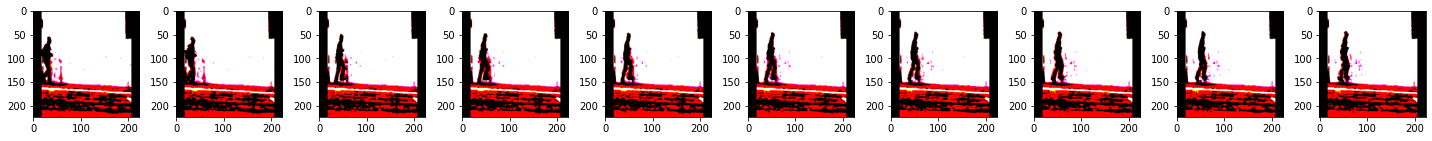

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

>>**Defining Test Classes**

In [ ]:
test_batches.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

>>**Making Predictions**

In [ ]:
MyModel = tf.keras.models.load_model('/content/drive/MyDrive/Project/Model2.h5')
loss, acc = MyModel.evaluate(test_batches, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

577/577 - 3450s - loss: 0.4751 - accuracy: 0.9400
Restored model, accuracy: 94.00%


In [ ]:
predictions = MyModel.predict(x = test_batches, verbose = 2)

577/577 - 34s


In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

>>**Plotting Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

In [ ]:
test_batches.class_indices

{'Non-Violent': 0, 'Violent': 1}

Confusion matrix, without normalization
[[3761  240]
 [ 314 4917]]


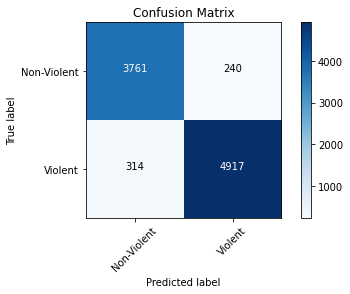

In [ ]:
cm_plot_labels = ['Non-Violent', 'Violent']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')

>**Video Classifier**

>>**Keyframe Detection**


In [1]:
def keyframeDetection(video_path, threshold):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(5))
    if fps == 0:
        print("Not available")

    keyframePath = 'keyframes'
    if not os.path.exists(keyframePath):
        os.makedirs(keyframePath)
    # Read the first frame.
    ret, prev_frame = cap.read()

    i = 0
    count = 0
    cv2.imwrite('keyframes/' + str(i) + '.jpg', prev_frame)
    while ret:
        ret, curr_frame = cap.read()
        if ret:
            diff = cv2.absdiff(curr_frame, prev_frame)
            non_zero_count = np.count_nonzero(diff)
            if non_zero_count > threshold:
                print("Saving Frame number: {}".format(i), end='\r')
                cv2.imwrite('keyframes/' + str(i) + '.jpg', curr_frame)
                count += 1
            prev_frame = curr_frame
            i += 1
    print("Total Number of frames saved: {}".format(count))